# CReM Notebook

# Global Variables and Helper Functions

In [1]:
db = r'C:\Users\walee\crem\example\database\replacements02_sc2.5.db'

## Drawer
Helper functions to draw molecules with highlighting atoms

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, Image

In [3]:
def drawsvg(mol, highlightAtoms=[], highlightReplacement=False, molSize=(400, 300), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        AllChem.Compute2DCoords(mc)
    if highlightReplacement:
        ids = []
        for a in mol.GetAtoms():
            if 'react_atom_idx' not in a.GetPropsAsDict():
                ids.append(a.GetIdx())
        if ids:
            highlightAtoms = ids
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc, highlightAtoms=highlightAtoms)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return SVG(svg.replace('svg:',''))

In [4]:
def drawgrid(mols, highlight=0):
    """
    highlight: 0 - no highlight
               1 - highlight changed atoms
               2 - highlight unchanged atoms
    """
    if highlight == 0:
        return Draw.MolsToGridImage(mols[:8], molsPerRow=4, subImgSize=(300,200), useSVG=True)
    else:
        ids_list = []
        for m in mols:
            ids = []
            for a in m.GetAtoms():
                if 'react_atom_idx' not in a.GetPropsAsDict():
                    ids.append(a.GetIdx())
            if highlight == 1:
                ids_list.append(ids)
            elif highlight == 2:
                ids_list.append(list(set(range(m.GetNumAtoms())) - set(ids)))
        return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,200), 
                                    highlightAtomLists=ids_list, useSVG=True)

# Structure Generation

## Mutate Mols

### mutate_mol
Generate new molecules by replacing fragments in the supplied molecule with fragments from the database.

In [5]:
from crem.crem import mutate_mol
from rdkit import Chem

m = Chem.MolFromSmiles('c1cc(OC)ccc1C')
mols = [Chem.MolFromSmiles(smiles) for smiles in mutate_mol(m, db_name=db, max_size=1)]

C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


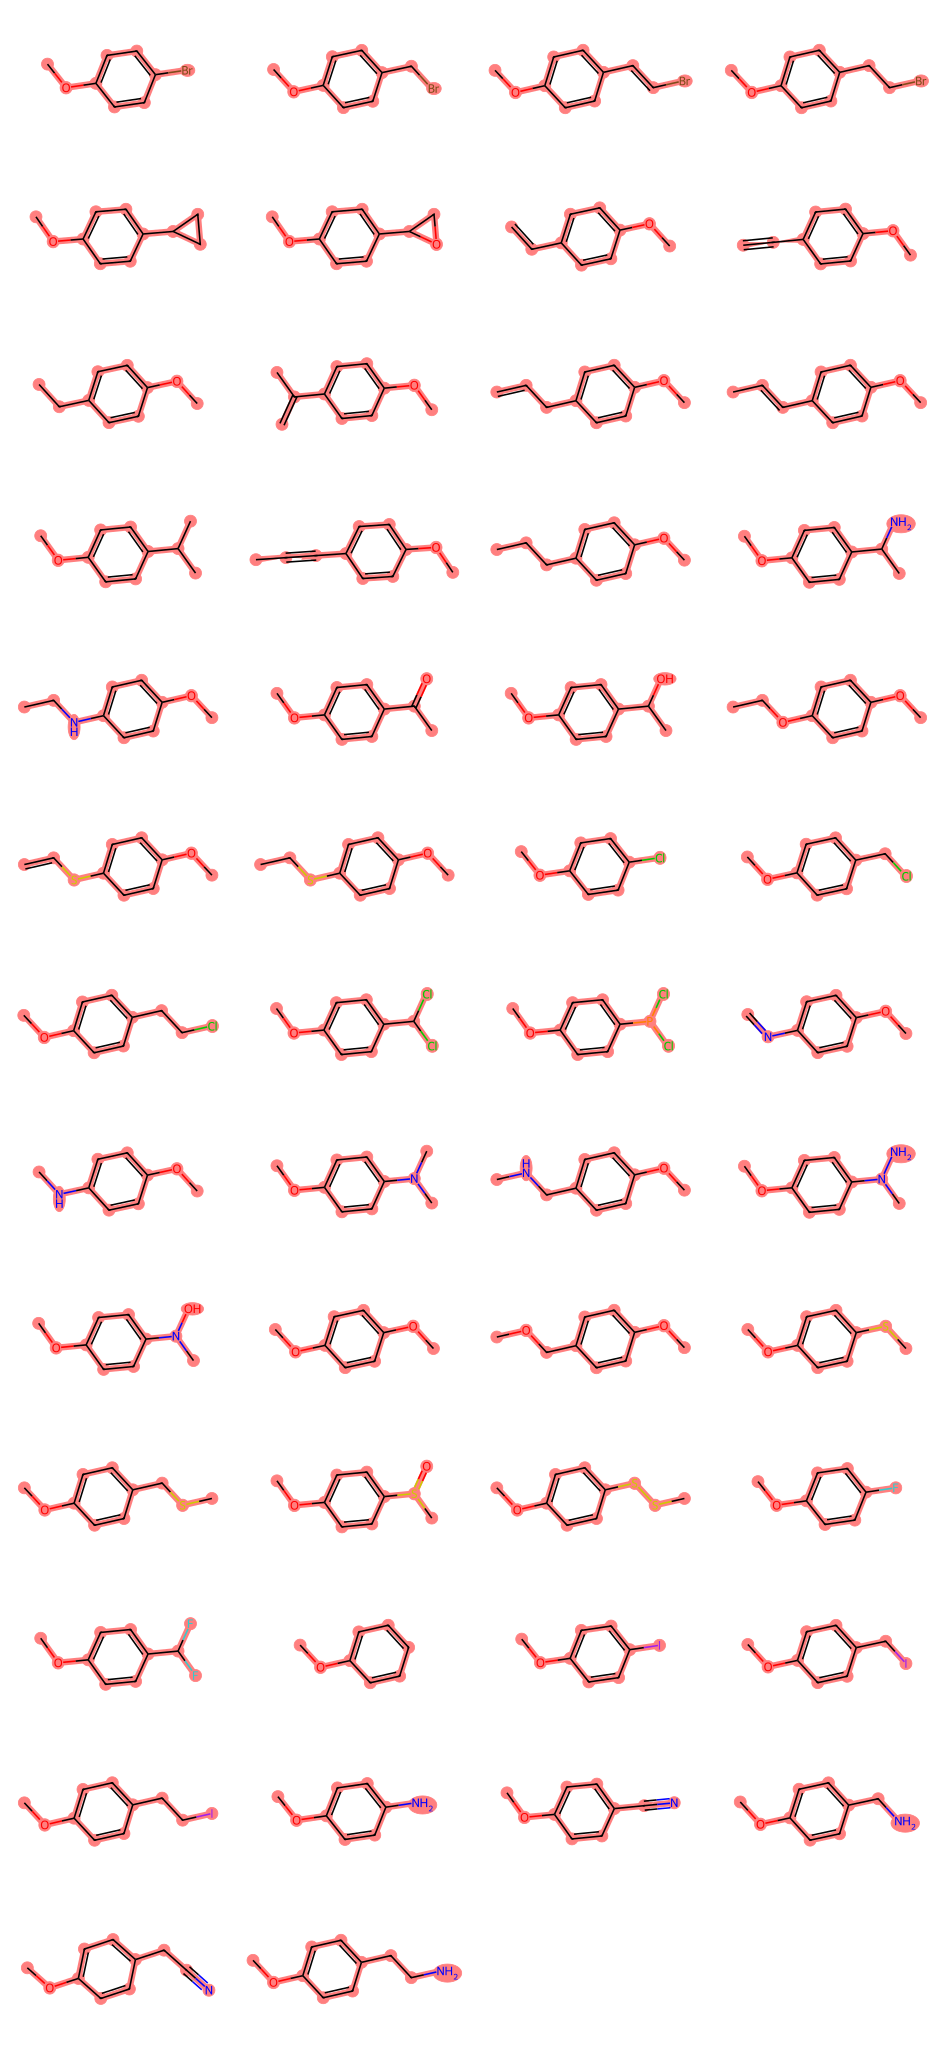

In [6]:
drawgrid(mols, highlight=1)

### mutate_mol2:
Convenience function for parallel processing using multiprocessing.

In [7]:
from multiprocessing import Pool
from functools import partial
from crem.crem import mutate_mol2
from rdkit import Chem

p = Pool(2)
input_smi = ['c1ccccc1N', 'NCC(=O)OC', 'NCCCO']
input_mols = [Chem.MolFromSmiles(s) for s in input_smi]

res = list(p.imap(partial(mutate_mol2, db_name=db, max_size=1), input_mols))

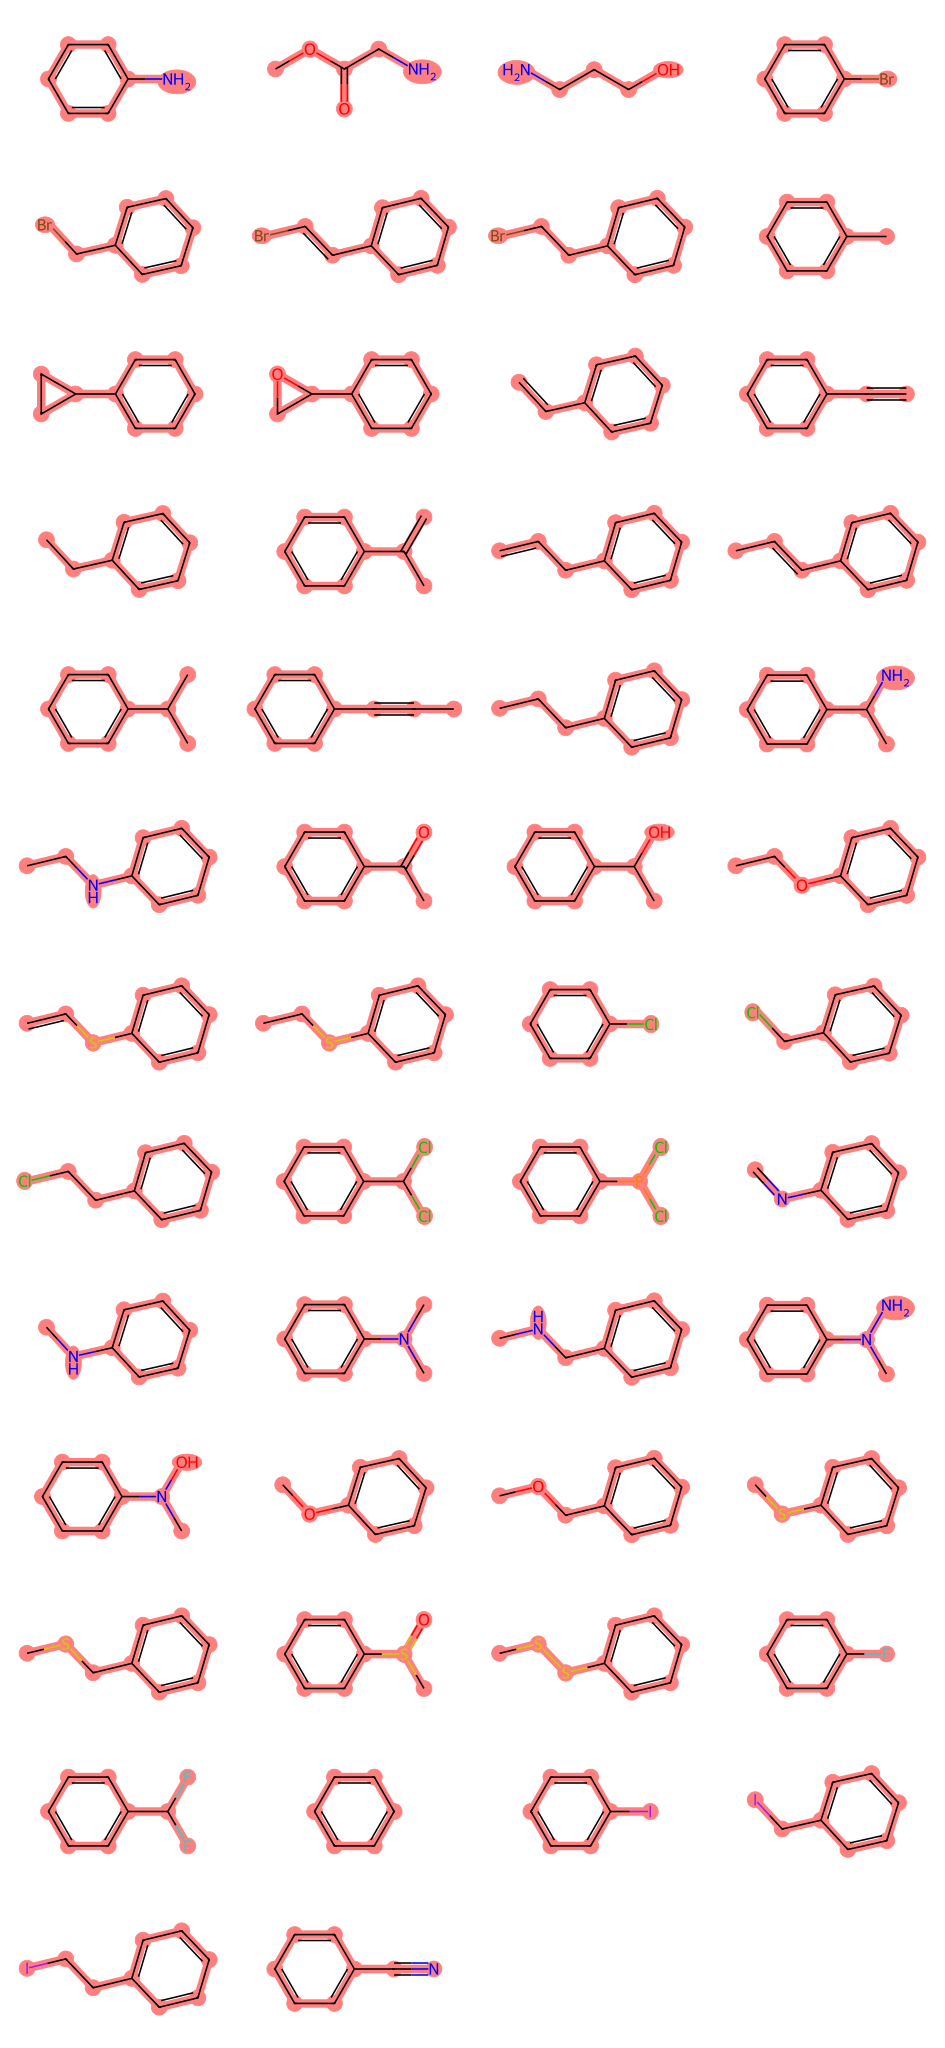

In [8]:
drawgrid([Chem.MolFromSmiles(s) for s in input_smi] + [Chem.MolFromSmiles(s) for s in res[0]], highlight=1)

## Grow Mols

### grow_mol:
Replace hydrogens with fragments from the database.

In [9]:
from crem.crem import grow_mol
from rdkit import Chem

m = Chem.MolFromSmiles('c1cc(OC)ccc1C')
mols = [Chem.MolFromSmiles(smiles) for smiles in grow_mol(m, db_name=db)]

[13:00:57] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:57] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:57] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:57] WARNING: not removing hydrogen atom with dummy atom neighbors


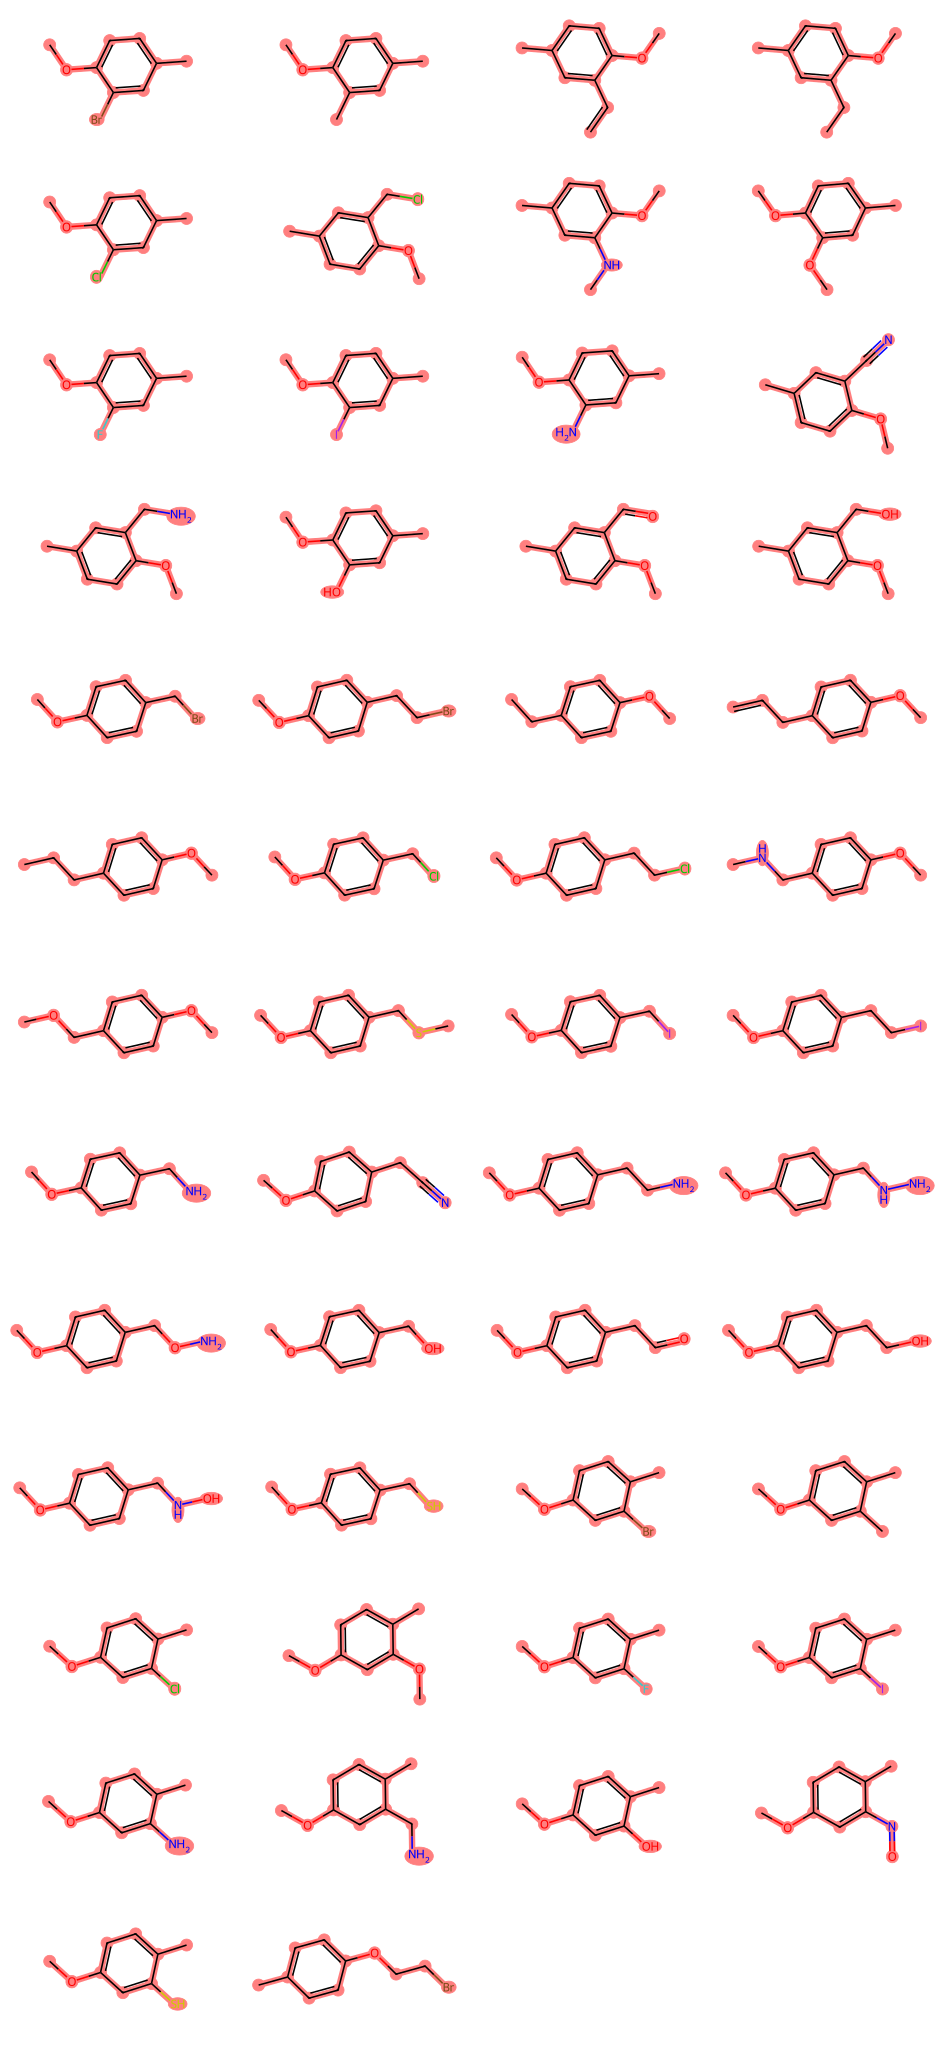

In [10]:
drawgrid(mols, highlight=1)

### grow_mol2:
Convenience function for parallel processing using multiprocessing.

In [11]:
from multiprocessing import Pool
from functools import partial
from crem.crem import grow_mol2
from rdkit import Chem

p = Pool(2)
input_smi = ['c1ccccc1N', 'NCC(=O)OC', 'NCCCO']
input_mols = [Chem.MolFromSmiles(s) for s in input_smi]

res = list(p.imap(partial(grow_mol2, db_name=db), input_mols))

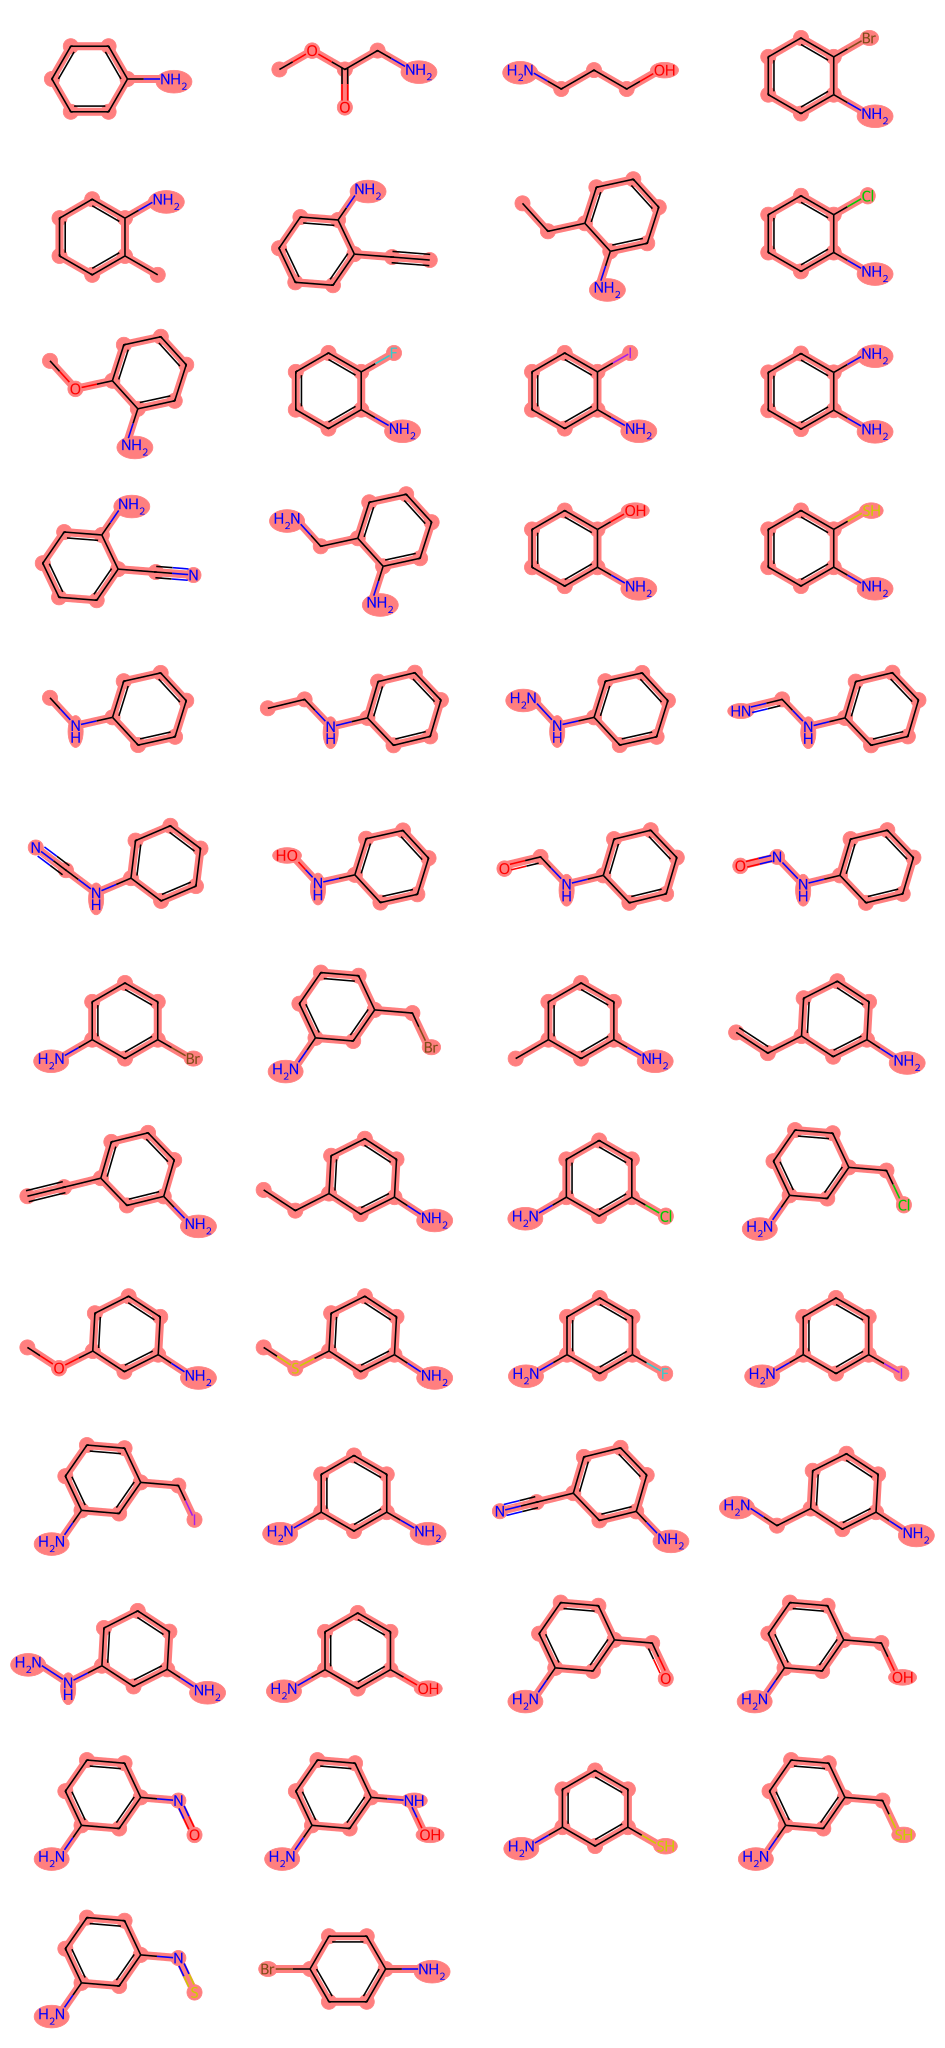

In [12]:
drawgrid([Chem.MolFromSmiles(s) for s in input_smi] + [Chem.MolFromSmiles(s) for s in res[0]], highlight=1)

## Link Mols

### link_mols:
Link two molecules by a linker from the database.

In [13]:
from crem.crem import link_mols
from rdkit import Chem

m1 = Chem.MolFromSmiles('c1cc(OC)ccc1C')
m2 = Chem.MolFromSmiles('NCC(=O)O')
mols = [Chem.MolFromSmiles(smile) for smile in link_mols(m1, m2, db_name=db)]

[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:00:58] WARNING: not removing hydrogen atom with

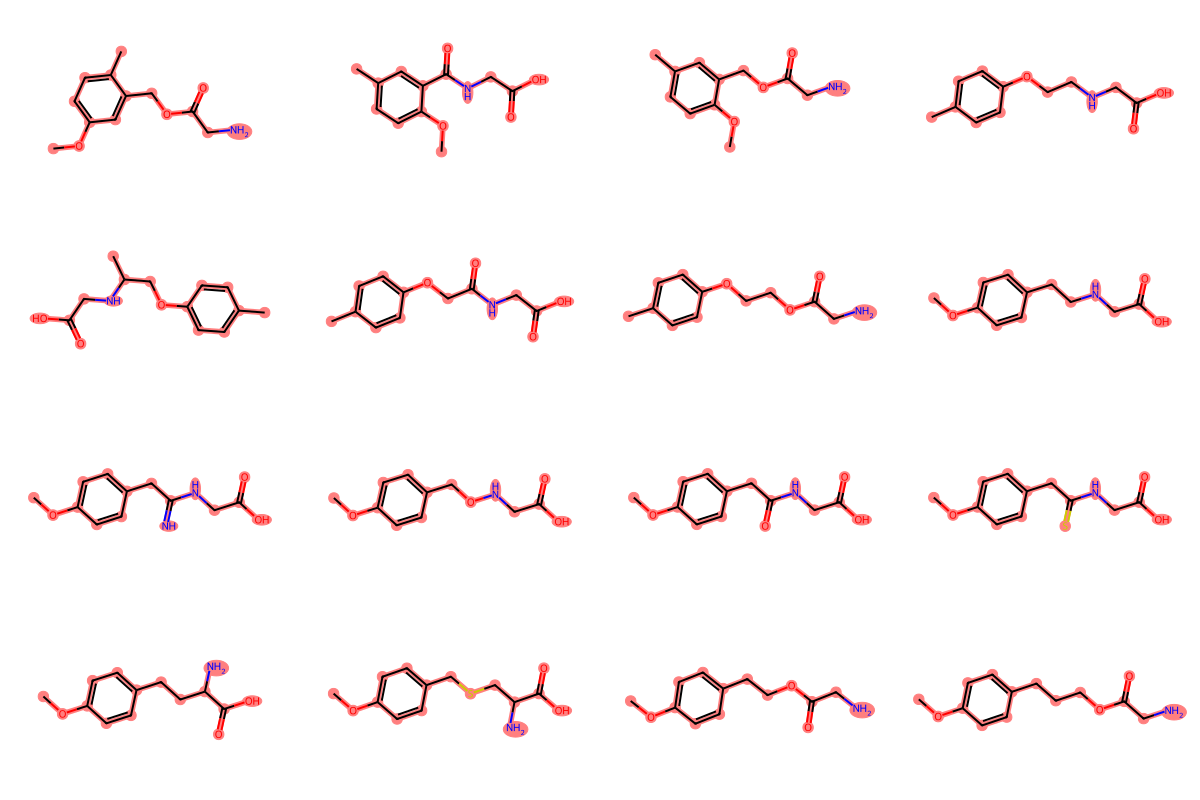

In [14]:
drawgrid(mols, highlight=1)

### link_mols2:
Convenience function for parallel processing using multiprocessing.

In [15]:
from multiprocessing import Pool
from functools import partial
from crem.crem import link_mols2
from rdkit import Chem

p = Pool(2)
input_mols = [(Chem.MolFromSmiles('c1cc(OC)ccc1C'), Chem.MolFromSmiles('NCC(=O)O'))]

res = p.starmap(partial(link_mols2, db_name=db), input_mols)

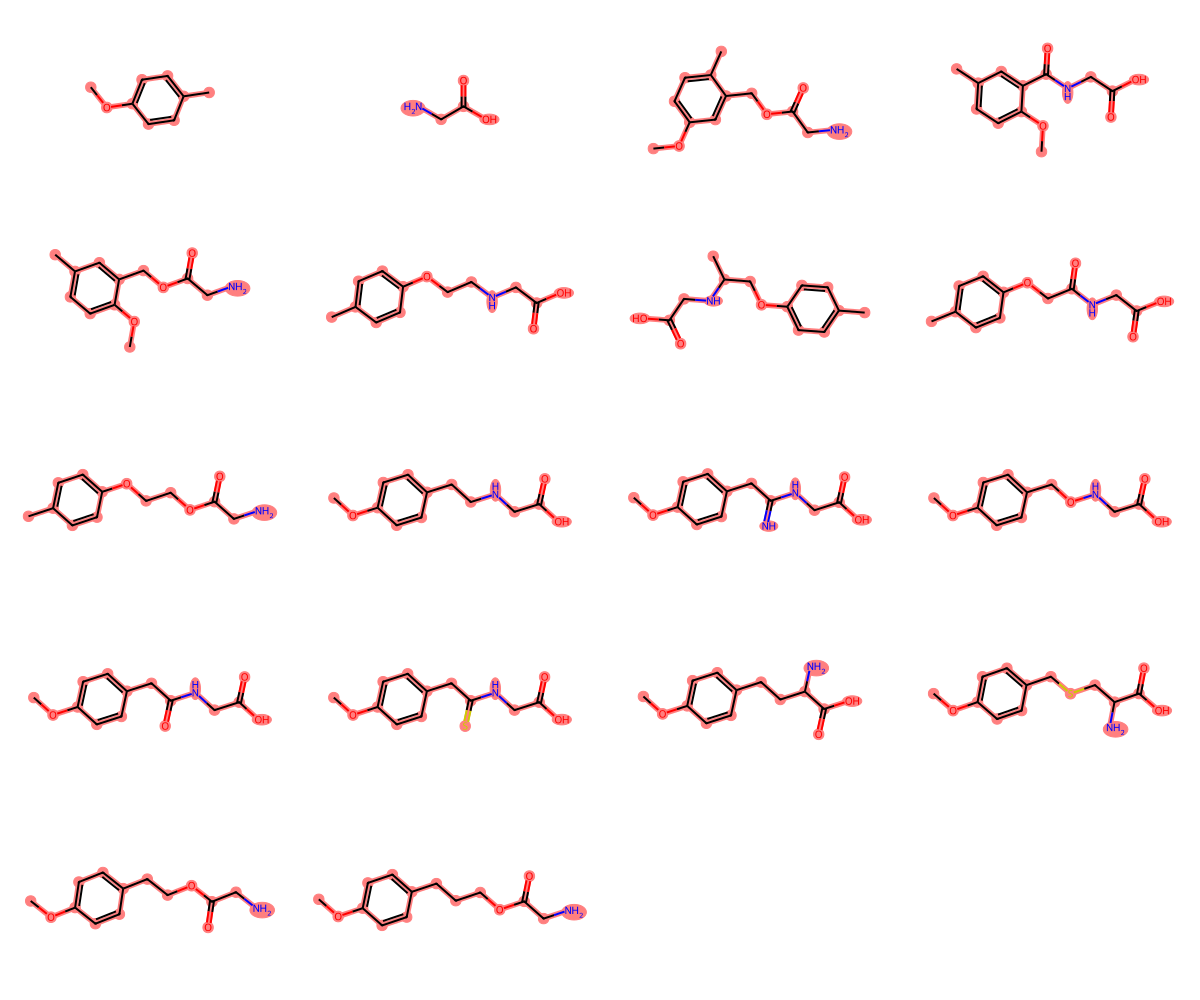

In [16]:
drawgrid([Chem.MolFromSmiles('c1cc(OC)ccc1C'), Chem.MolFromSmiles('NCC(=O)O')] + [Chem.MolFromSmiles(s) for s in res[0]], highlight=1)

# Command Line Utilities

In [17]:
import os
os.chdir(r'C:\Users\walee\crem\example')
print(os.getcwd())

C:\Users\walee\crem\example


## Fragmentation:
Fragment input compounds by cutting bonds matching bond SMARTS.

In [18]:
!python ../crem/fragmentation.py -i ../input-files/input.smi -o ../output-files/output_frag.txt -c 32 -v

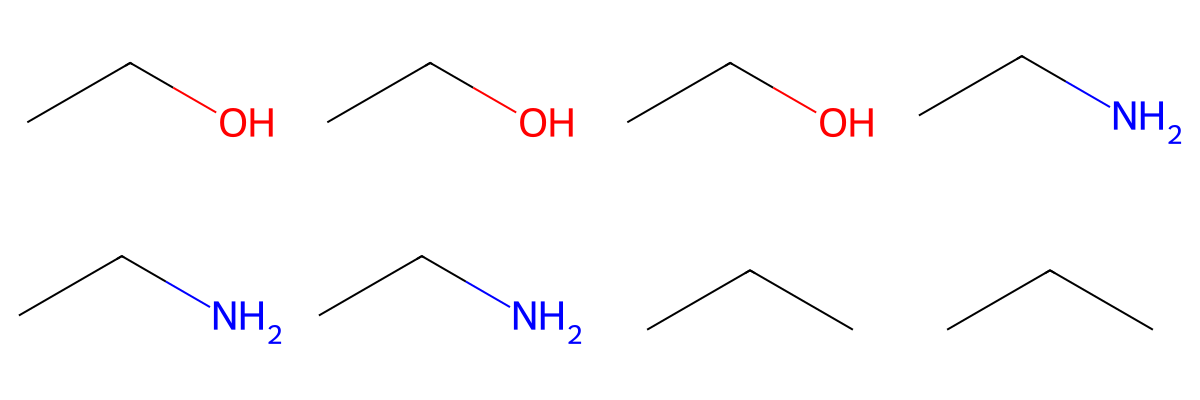

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display

with open('../output-files/output_frag.txt') as f:
    smiles_list = f.readlines()[:8]

# Clean up the SMILES strings and convert to RDKit molecule objects
mols = []
for s in smiles_list:
    smiles = s.split(',')[0].strip()
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols.append(mol)

drawgrid(mols, highlight=0)

### Convert Fragments to Environment:
Create text file for fragment replacement from fragmented molecules.

In [20]:
!python -m crem.frag_to_env_mp -i ../input-files/frags.txt -o ../output-files/output_env.txt -r 3 -c 32 -v

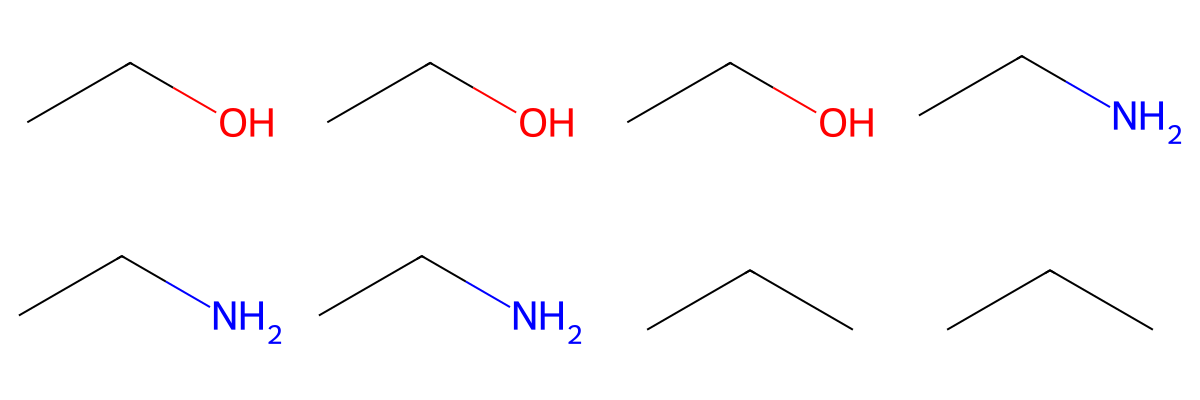

In [21]:
drawgrid(mols, highlight=0)

### Create SQLite DB:
Create SQLite DB from a text file containing environment fragments.

In [22]:
!python -m crem.import_env_to_db -i ../input-files/env_frags.txt -o ../output-files/output.db -r 3 -n 32 -v

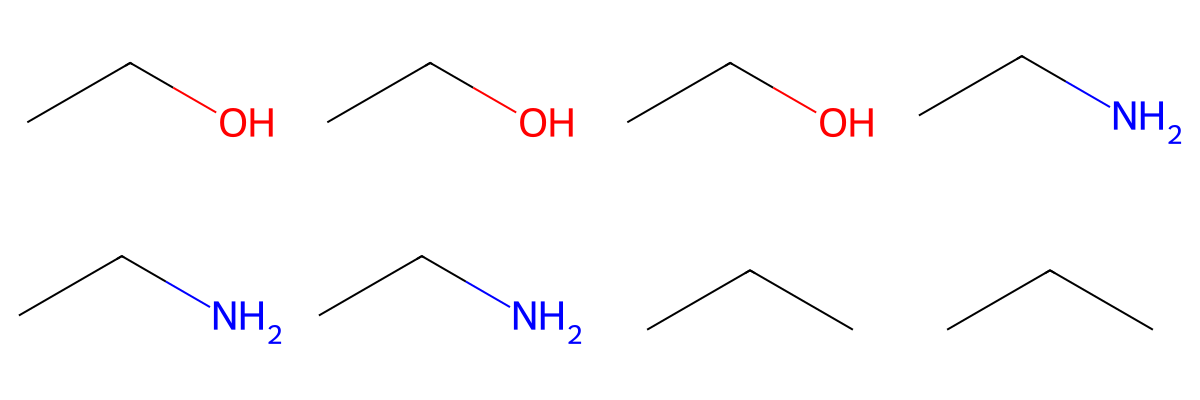

In [23]:
drawgrid(mols, highlight=0)